In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

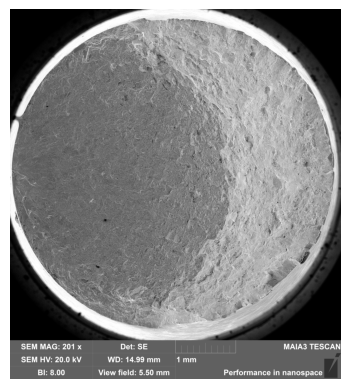

In [66]:
# Read the image
img = cv2.imread('C:\\Users\\yoni mazin\\Downloads\\images\\P1MF17_N_01.tif',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color conversion from rgb to grayscale
_, width = gray.shape # '.shape' retrieve tuple which represent height and width. the underscore
                      # "_" is used to discard the height information
plt.axis('off') # hide the axis of the plot
plt.imshow(img)
plt.show()
# we need the two last lines of code because 'plt.imshow(img)' is like prepare the content that we want to display
# and 'plt.show()' is to actually display this content

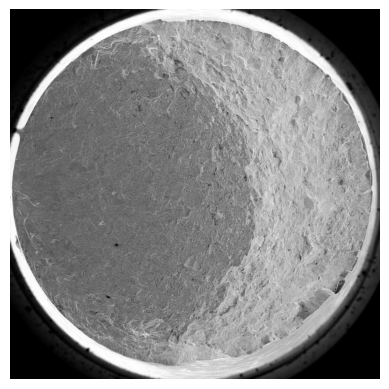

In [67]:
# Remove bottom bar
img = img[0:width, 0:width]
gray = gray[0:width, 0:width]
plt.axis('off')
plt.imshow(img)
plt.show()

In [68]:
img.shape

(4096, 4096, 3)

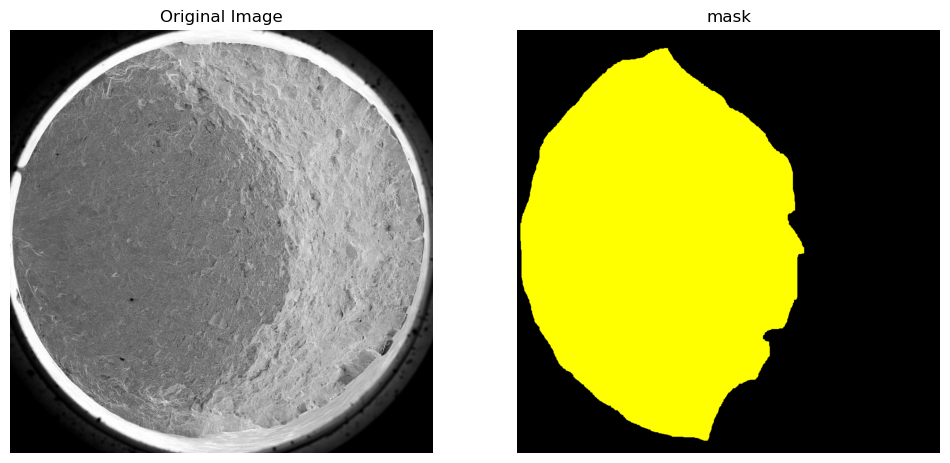

Image with contour saved to C:\Users\yoni mazin\Downloads\mask images\P1MF17_N_01_mask.jpg 


In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = img 

# create a copy of the image for drawing points.
image_copy = image.copy()

# initialize variables to store points and drawing state
contour_points = []
drawing = False

# a function for mouse event.
def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        # increase the circle size to make the points more bold.
        cv2.circle(image_copy, (x, y), 10, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)  
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)  # Set the window size to 10x10 inches
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

# Create a mask with the contour
mask = np.zeros_like(image)
if len (contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.fillPoly(mask, [points], (0, 255, 255))

# Save the image with contour
output_path = "C:\\Users\\yoni mazin\\Downloads\\mask images\\P1MF17_N_01_mask.jpg " 
result_image = cv2.addWeighted(image, 1, mask, 0.5, 0)
cv2.imwrite(output_path, mask)

# subplot with two images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# display only the mask on the right
axes[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
axes[1].set_title("mask")
axes[1].axis("off")

plt.show()

print(f"Image with contour saved to {output_path}")
